# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [296]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [297]:
# Check for the missing values in a dataframe
penguins_df.isna().sum().sort_values(ascending = False)

sex                  9
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [298]:
# Check for the dataframe information
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


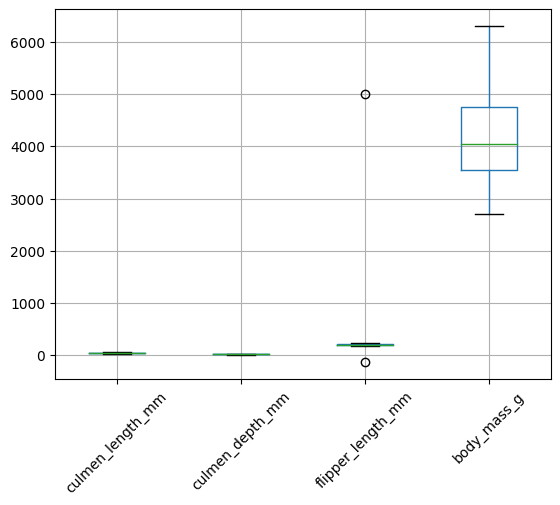

In [299]:
# Check the outliers using boxplot
penguins_df.boxplot(rot = 45)
plt.show()

In [300]:
# Removing null values 
penguins_df = penguins_df.dropna()
# Removing outliers
penguins_df[(penguins_df["flipper_length_mm"] > 4000)|(penguins_df["flipper_length_mm"] < 0)]
penguins_clean = penguins_df.drop([9, 14])
penguins_clean.shape

(333, 5)

In [301]:
# Change categorical column to binary 
penguins_clean = pd.get_dummies(penguins_clean, drop_first=True)
# Instantiate scaler object
scaler = StandardScaler()
# Transform the dataframe
penguins_preprocessed = pd.DataFrame(scaler.fit_transform(penguins_clean), columns=penguins_clean.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


In [302]:
# Create PCA model
model = PCA()
# Fit the model and transform the data
df_pca = model.fit(penguins_preprocessed)
# Keep only feature with more than 10% of explained variance ratio
n_components = (df_pca.explained_variance_ratio_ > 0.1).sum()
# Perform PCA using n_components obtained above
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

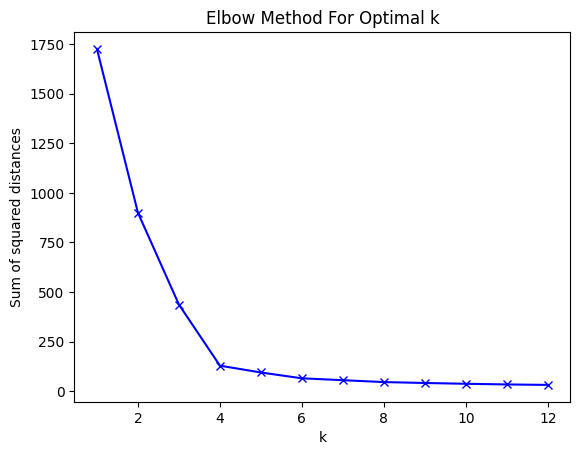

In [303]:
# Determine the optimal number of clusters
# Create empty list 
sum_square_distance = []
# Fit Kmeans model for a range of clusters numbers
for k in range(1, 13):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(penguins_PCA)
    sum_square_distance.append(kmeans.inertia_)
    
# Visualize to find the n_clusters at "elbow"
plt.plot(range(1, 13), sum_square_distance, "bx-")
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method For Optimal k")
plt.show()    

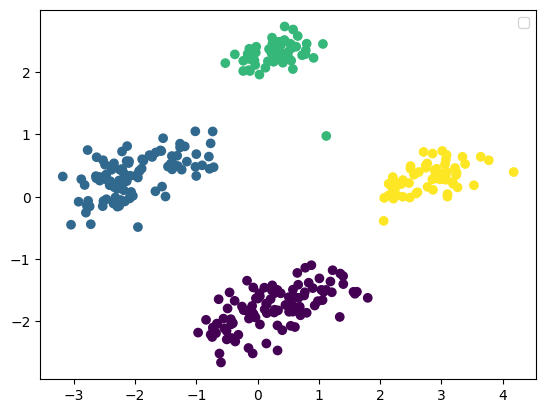

In [304]:
# Optimal number of clusters
n_cluster = 4
# Fit KMeans model for the optimal n_clusters
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(penguins_PCA)
# Visualize the clusters 
plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c = kmeans.labels_, cmap="viridis")
plt.legend()
plt.show()

In [305]:
# Add label column to the dataframe for further analysis
penguins_clean["label"] = kmeans.labels_
# Create a statistical table to calculate mean across label column
num_col = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
stat_penguins = penguins_clean.groupby("label")[num_col].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
